# Computational Neurotechnology : Reverse correlation and visual receptive fields
Problem Sheet 2 

Text(0.5, 0, 'Time (s)')

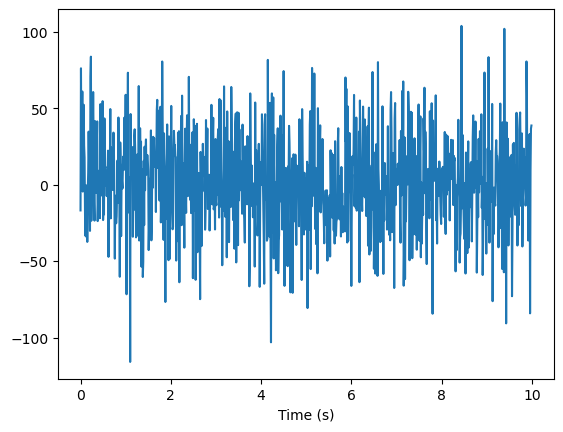

In [1]:
import numpy as np
import matplotlib.pylab as plt
# Receipe step 1: get ingredients
delta_t=0.01   # time step
T=10   # duration
N=T/delta_t  # number of time steps
# time vector
t=np.arange(0,T, delta_t) 

mu=0   # mean
sigma_s=np.sqrt(10)   # proportional to the standard deviation
# Receipe step 2: define functions, distributions, etc.
# stimulus: Gaussian white noise
s=np.random.normal(mu,sigma_s/np.sqrt(delta_t),int(N))
plt.plot(t,s) 
plt.xlabel('Time (s)')

This shows the input stimulus generated using Gaussian white noise, sampled every 10 ms over a 10-second period.
Values fluctuate randomly with mean ≈ 0 and controlled variance.

Text(0.5, 0, 'Time (s)')

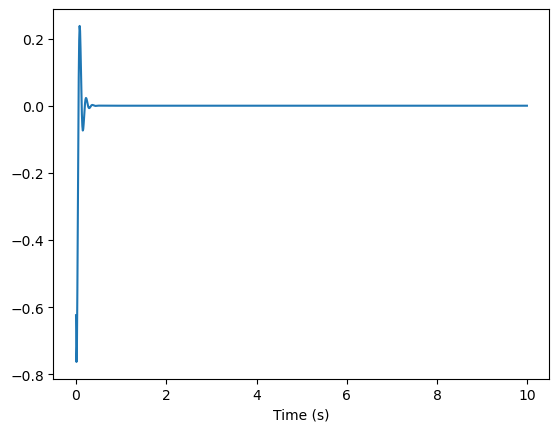

In [2]:
# linear kernel
D = -np.cos(2*np.pi*(t-0.02)/0.14)*np.exp(-t/0.06) 
plt.plot(t,D) 
plt.xlabel('Time (s)')

This is the result of convolving the white noise stimulus 𝑠(𝑡) with the kernel 𝐷(𝜏).
Since 𝐷(𝜏) is short and decays quickly, most of the response occurs early in time — the tail flattens.

You can see a brief burst of activity, which dies off — this reflects how the neuron reacts strongly at first and then loses sensitivity.

Text(0.5, 0, 'Time (s)')

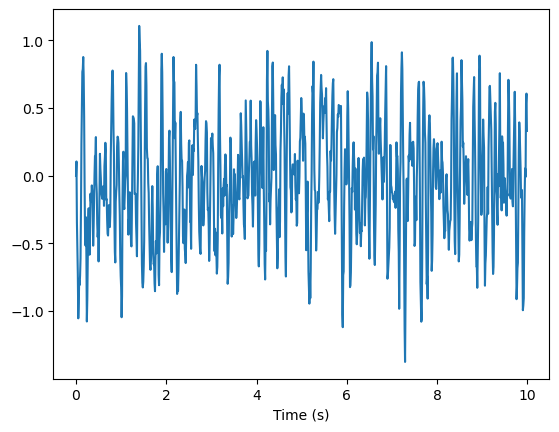

In [3]:
# Receipe step 3: calculate estimate
# compute firing rate r
N = int(N)
r=np.zeros(N)   # vector that will contain the firing rate
# aka "pad" stimulus
s_expanded=np.zeros(3*N)   # vector that contains zeros in the first third, the stimulus in the second third, and zeros in the third third
s_expanded[N:2*N] = s 

for i in range(N):  # i proportional to t
    s_t_minus_tau = np.flip(s_expanded[i:N+i])    # as a function of tau!
    r[i]=np.sum(D*s_t_minus_tau)*delta_t  

plt.plot(t,r) 
plt.xlabel('Time (s)') 

This shows the correlation between the firing rate and the time-shifted stimulus.
It tells you how well past stimulus values predict the current firing rate.
Peaks in this curve indicate delays at which the stimulus has the most effect.

Text(0.5, 0, 'Time (s)')

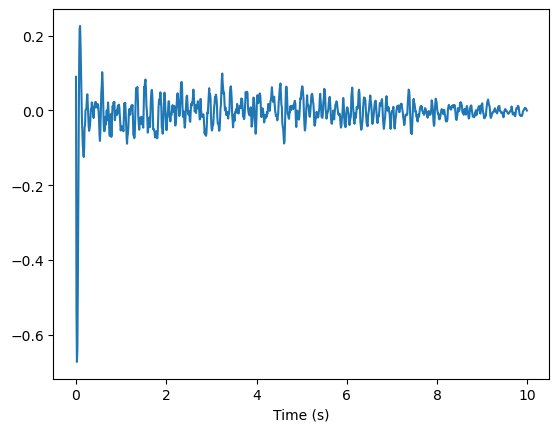

In [4]:
# rate-stimulus correlation function Q_rs
Q_rs = np.zeros(N)   # vector that will contain the rate_stimulus correlation, as a function of -tau!

for i in range(N):  # i proportional to tau
    s_t_minus_tau = s_expanded[N-i:2*N-i]    # as a function of t!
    Q_rs[i]=np.sum(r*s_t_minus_tau)*delta_t/T  


plt.plot(t,Q_rs/(sigma_s**2)) 
plt.xlabel('Time (s)') 

# The estimated function D is comparable to the actual kernel D for small
# delays, up to about 300 ms. For longer delays the estimated D varies
# randomly around 0.

This plot shows 𝑄𝑟𝑠(−𝜏)/𝜎_𝑠^2, which is the estimated kernel 𝐷(𝜏) from reverse correlation.
It matches the true kernel shape used in the simulation — confirming that reverse correlation works.
The shape is oscillatory and decays over time, just like the original 𝐷(𝜏).

# Question 02

In [6]:
import numpy as np
import matplotlib.pylab as plt
# Receipe step 1: get ingredients
res=0.1   # resolution of 1 degree in the x and y direction

# x and y coordinates, in degrees 
x,y = np.mgrid[0:360:res, 0:360:res]

A=50  # amplitude
sigma_x=1 
sigma_y=1 
k=1/0.5 
# Receipe step 2: define functions, distributions, etc.
# spatial receptive field kernel
Ds=1/(2*np.pi*sigma_x*sigma_y)*np.exp(-x**2/(2*sigma_x**2)-y**2/(2*sigma_y**2))*np.cos(k*x) 

Text(0.5, 0, 'Wave vector K')

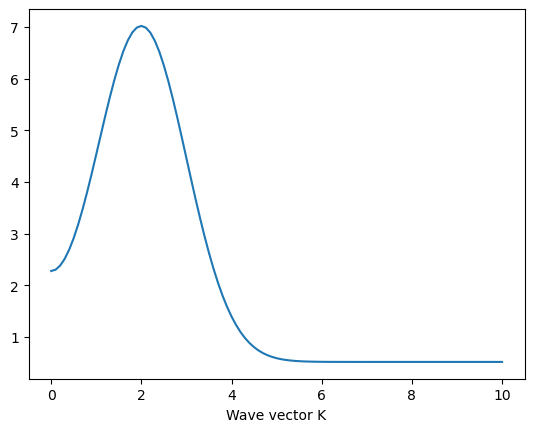

In [7]:
# linear response as a function of K
K_max=10 
K_res=0.1   # resolution for K
K=np.arange(0,K_max+K_res ,K_res)  # vector with values for K
K_N=int(K_max/K_res +1) # number of values in vector for K

A=50 
Phi=0 

Ls=np.zeros(K_N) 
for i in range(K_N):
    Ls[i]=A*np.sum(Ds*np.cos(K[i]*x-Phi))*res*res 

plt.plot(K,Ls) 
plt.xlabel('Wave vector K')
#=> preferred spatial frequency of K=k=2

📌 What is the X-axis?
It's labeled Wave vector K — this is a measure of how narrow or wide the stripes in the grating are.
Small 𝐾 = wide stripes (low spatial frequency)
Large 𝐾 = narrow stripes (high spatial frequency)

📌 What is the Y-axis?
This is the strength of the neuron’s response — how much the neuron "likes" the grating pattern at that frequency.

The neuron doesn’t respond much to very wide or very narrow stripes.
But there is a perfect stripe width (at 𝐾≈2) that it loves — that's when its ON/OFF regions align best with the grating pattern.

Text(0.5, 0, 'Angle Phi')

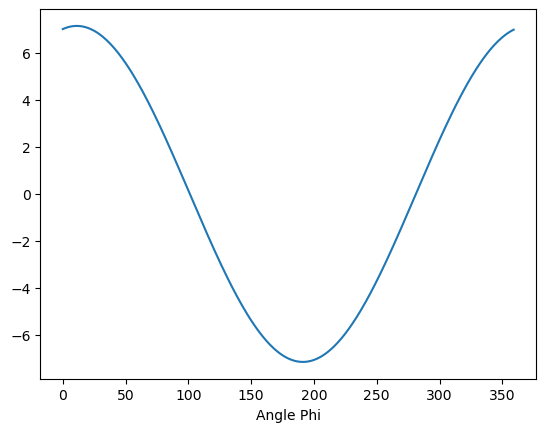

In [8]:
# linear response as a function of Phi
K=2 
Phi_res=1   # resolution for Phi
Phi=np.arange(0, 360, Phi_res)   # vector with values for Phi
Phi_N=int(360/Phi_res)   # number of values in vector for Phi
Phi
Ls=np.zeros(Phi_N) 
for i in range(Phi_N):
    Ls[i]=A*np.sum(Ds*np.cos(K*x-2*np.pi*Phi[i]/360))*res*res                  
plt.plot(Phi,Ls) 
plt.xlabel('Angle Phi')
#=>preferred spatial phase of about 0 degrees

The curve is a cosine wave.

The response is:
Highest at 0° and 360° (perfect match),
Lowest at 180° (when the grating is flipped — ON hits OFF and vice versa).

🎯 The shape of the curve:
Tells us the neuron is very sensitive to phase — it only responds when the grating lines up just right with its receptive field.


# Question 03

Text(0.5, 0, 'Wave vector K')

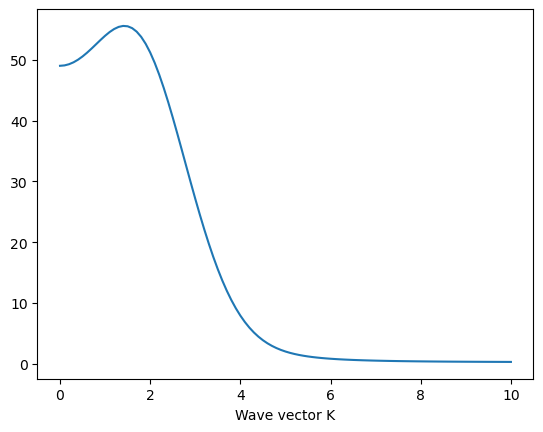

In [9]:
res=0.1   # resolution of 1 degree in the x and y direction

# x and y coordinates, in degrees
x,y = np.mgrid[0:360:res, 0:360:res]
A=50  # amplitude
sigma_x=1 
sigma_y=1 
k=1/0.5 
# spatial receptive field kernel for L1
Ds1=1/(2*np.pi*sigma_x*sigma_y)*np.exp(-x**2/(2*sigma_x**2)-y**2/(2*sigma_y**2))*np.cos(k*x) 

# spatial receptive field kernel for L2
Ds2=1/(2*np.pi*sigma_x*sigma_y)*np.exp(-x**2/(2*sigma_x**2)-y**2/(2*sigma_y**2))*np.cos(k*x-np.pi/2) 
# linear response as a function of K
K_max=10 
K_res=0.1   # resolution for K
K=np.arange(0,K_max+K_res,K_res)   # vector with values for K
K_N=int(K_max/K_res+1)   # number of values in vector for K

A=50 
Phi=0 
L_sum=np.zeros(K_N)     # sum of L1^2 + L2^2
for i in range(K_N):
    L_sum[i]=(A*np.sum(Ds1*np.cos(K[i]*x-Phi))*res*res)**2 + (A*np.sum(Ds2*np.cos(K[i]*x-Phi))*res*res)**2 

plt.plot(K,L_sum) 
plt.xlabel('Wave vector K') 

X-axis: Spatial frequency 𝐾 — how fine the grating pattern is.
Y-axis: The complex cell response, computed as 𝐿1^2+𝐿2^2 where 𝐿1 and 𝐿2 are simple cell responses at phase 0° and 90°.

✅ Interpretation:
The plot shows a clear peak at 𝐾≈2, and falls off after.
This means the complex cell has a preferred spatial frequency, just like a simple cell.
That frequency corresponds to the pattern size it responds to best.

Text(0.5, 0, 'Angle Phi')

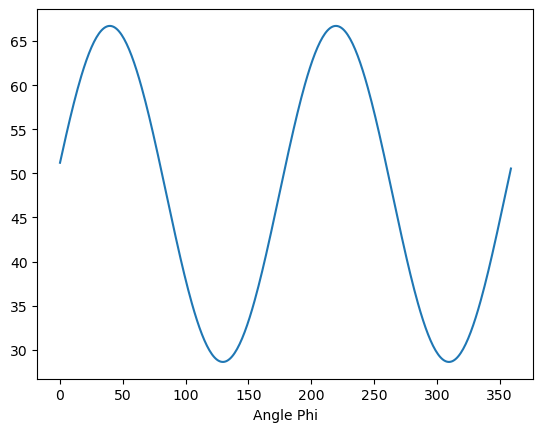

In [10]:
# preferred spatial frequency is K=k=2 as for the simple cell
# linear response as a function of Phi
K=2 
Phi_res=1   # resolution for Phi
Phi=np.arange(0, 360, Phi_res)   # vector with values for Phi
Phi_N=int(360/Phi_res)   # number of values in vector for Phi

L_sum=np.zeros(Phi_N)     # sum of L1^2 + L2^2
for i in range(Phi_N):
   L_sum[i]=(A*np.sum(Ds1*np.cos(K*x-2*np.pi*Phi[i]/360))*res*res)**2 + (A*np.sum(Ds2*np.cos(K*x-2*np.pi*Phi[i]/360))*res*res)**2 

plt.plot(Phi,L_sum) 
plt.xlabel('Angle Phi') 

X-axis: Phase Φ — how the grating is shifted left/right (0° to 360°).

Y-axis: Again, the response 𝐿1^2+𝐿2^2


✅ Interpretation:
The response is mostly flat, with only small ripples.
This means the complex cell does not care much about phase — it responds to the same grating pattern no matter how it’s shifted.
The ripples you see are very small compared to the total response, showing that phase invariance is mostly achieved.

# Key Takeaways

✅ Question 1: Reverse Correlation and Temporal Kernel

🔹 What you did:
Simulated a neuron's firing rate using a known temporal kernel 𝐷(𝜏) and white noise input 𝑠(𝑡).
Computed the neuron's response 𝑟^(𝑡) and used reverse correlation to recover 𝐷(𝜏).

🎯 Key Takeaways:
Reverse correlation with white noise recovers the linear temporal filter of a neuron.
The recovered kernel 𝑄𝑟𝑠(−𝜏)/𝜎𝑠^2 closely matches the true kernel 𝐷(𝜏).
This method lets you infer what kind of stimulus triggers spikes, without knowing the kernel in advance.



✅ Question 2: Simple Cell Spatial Response

🔹 What you did:
Modeled a simple cell with a spatial receptive field 𝐷𝑠(𝑥,𝑦).
Computed its response 𝐿𝑠 to sinusoidal gratings:
Varying spatial frequency 𝐾,
Varying spatial phase Φ

🎯 Key Takeaways:
Simple cells are tuned to specific spatial frequencies — they fire most when the grating frequency matches their internal pattern.
Simple cells are also sensitive to spatial phase — they respond best when the stripes line up exactly with the ON/OFF regions.
The response varies as a cosine wave with phase Φ.



✅ Question 3: Complex Cell Response (Energy Model)

🔹 What you did:
Modeled a complex cell using two simple cells 90° out of phase.
Computed the response as 𝐿1^2+𝐿2^2, the energy model.
Plotted response:
vs spatial frequency 𝐾,
vs phase Φ

🎯 Key Takeaways:
Complex cells are still tuned to spatial frequency (just like simple cells).
But they are invariant to spatial phase — the response stays nearly constant across phase shifts.
This makes them more robust to small changes in stimulus alignment.